In [1]:
import pandas as pd
import numpy as np

In [13]:
df = pd.read_csv('SP500_for_practice_csv.csv')
print(df)
print('The type of datetime element is ', type(df['Date'][0]))

           Date     SP500  SP500_%Change
0      1995/1/3    459.11            NaN
1      1995/1/4    460.71       0.348500
2      1995/1/5    460.34      -0.080311
3      1995/1/6    460.68       0.073858
4      1995/1/9    460.83       0.032561
...         ...       ...            ...
6400   2020/6/4  3,112.35      -0.336870
6401   2020/6/5  3,193.93       2.621170
6402   2020/6/8  3,232.39       1.204159
6403   2020/6/9  3,207.18      -0.779918
6404  2020/6/10  3,190.14      -0.531308

[6405 rows x 3 columns]
The type of datetime element is  <class 'str'>


In [7]:
#Argument: parse_dates: making time column TimeStamps from string
df2 = pd.read_csv('SP500_for_practice_csv.csv', parse_dates = ['Date'])
print(df2)
print('The type of datetime element is ', type(df2['Date'][0]))

           Date     SP500  SP500_%Change
0    1995-01-03    459.11            NaN
1    1995-01-04    460.71       0.348500
2    1995-01-05    460.34      -0.080311
3    1995-01-06    460.68       0.073858
4    1995-01-09    460.83       0.032561
...         ...       ...            ...
6400 2020-06-04  3,112.35      -0.336870
6401 2020-06-05  3,193.93       2.621170
6402 2020-06-08  3,232.39       1.204159
6403 2020-06-09  3,207.18      -0.779918
6404 2020-06-10  3,190.14      -0.531308

[6405 rows x 3 columns]
The type of datetime element is  <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [36]:
#Make time column the datetime "index" when reading the data
#Useful for time series analysis/modelling
df3 = pd.read_csv('SP500_for_practice_csv.csv', parse_dates = ['Date'], index_col = 'Date')
print(df3)
print(df3.index)

               SP500  SP500_%Change
Date                               
1995-01-03    459.11            NaN
1995-01-04    460.71       0.348500
1995-01-05    460.34      -0.080311
1995-01-06    460.68       0.073858
1995-01-09    460.83       0.032561
...              ...            ...
2020-06-04  3,112.35      -0.336870
2020-06-05  3,193.93       2.621170
2020-06-08  3,232.39       1.204159
2020-06-09  3,207.18      -0.779918
2020-06-10  3,190.14      -0.531308

[6405 rows x 2 columns]
DatetimeIndex(['1995-01-03', '1995-01-04', '1995-01-05', '1995-01-06',
               '1995-01-09', '1995-01-10', '1995-01-11', '1995-01-12',
               '1995-01-13', '1995-01-16',
               ...
               '2020-05-28', '2020-05-29', '2020-06-01', '2020-06-02',
               '2020-06-03', '2020-06-04', '2020-06-05', '2020-06-08',
               '2020-06-09', '2020-06-10'],
              dtype='datetime64[ns]', name='Date', length=6405, freq=None)


Timestamp type

In [55]:
#pd.to_datetime
df_copy = df.copy()
df_copy['Date'] = pd.to_datetime(df_copy['Date'])
print(type(df_copy['Date'][1]))

#Set Timestamp series object to (datetime) Index
df_copy.set_index(keys = 'Date', inplace = True)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [53]:
#pd.DatetimeIndex
df_copy = df.copy()
df_copy['Date'] = pd.DatetimeIndex(df_copy['Date'])
print(type(df_copy.Date[0]))
print(df_copy)
print('Set TimeStamp to index')
#Set Date to index
df_copy.set_index(keys = 'Date', inplace = True)
print(df_copy)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
           Date     SP500  SP500_%Change
0    1995-01-03    459.11            NaN
1    1995-01-04    460.71       0.348500
2    1995-01-05    460.34      -0.080311
3    1995-01-06    460.68       0.073858
4    1995-01-09    460.83       0.032561
...         ...       ...            ...
6400 2020-06-04  3,112.35      -0.336870
6401 2020-06-05  3,193.93       2.621170
6402 2020-06-08  3,232.39       1.204159
6403 2020-06-09  3,207.18      -0.779918
6404 2020-06-10  3,190.14      -0.531308

[6405 rows x 3 columns]
Set TimeStamp to index
               SP500  SP500_%Change
Date                               
1995-01-03    459.11            NaN
1995-01-04    460.71       0.348500
1995-01-05    460.34      -0.080311
1995-01-06    460.68       0.073858
1995-01-09    460.83       0.032561
...              ...            ...
2020-06-04  3,112.35      -0.336870
2020-06-05  3,193.93       2.621170
2020-06-08  3,232.39       1.204159
2020-06-09  3

In [19]:
#Use datetime index to select/slice data
df_slice = df_copy['2020-06-04':'2020-06-10']
print(df_slice)

               SP500  SP500_%Change
Date                               
2020-06-04  3,112.35      -0.336870
2020-06-05  3,193.93       2.621170
2020-06-08  3,232.39       1.204159
2020-06-09  3,207.18      -0.779918
2020-06-10  3,190.14      -0.531308


In [22]:
print('------Select the data since 2020-06-04------')
print(df_copy[df_copy.index > '2020-06-04'])
print('------Select the data since the year 2020------')
print(df_copy[df_copy.index > '2020'])

------Select the data since 2020-06-04------
               SP500  SP500_%Change
Date                               
2020-06-05  3,193.93       2.621170
2020-06-08  3,232.39       1.204159
2020-06-09  3,207.18      -0.779918
2020-06-10  3,190.14      -0.531308
------Select the data since the year 2020------
               SP500  SP500_%Change
Date                               
2020-01-02   3257.85       0.837878
2020-01-03   3234.85      -0.705987
2020-01-06   3246.28       0.353339
2020-01-07   3237.18      -0.280321
2020-01-08   3253.05       0.490242
...              ...            ...
2020-06-04  3,112.35      -0.336870
2020-06-05  3,193.93       2.621170
2020-06-08  3,232.39       1.204159
2020-06-09  3,207.18      -0.779918
2020-06-10  3,190.14      -0.531308

[111 rows x 2 columns]


# Resample

Converse the frequency of data and resample it

In [30]:
df_copy.SP500.resample('M')

In [54]:
# Do the operations on the resampler object
df_copy['SP500_%Change'].astype('float').resample('M').mean()
#Got the mean based on monthly frequency. This also means getting the mean of the month

Date
1995-01-31    0.122402
1995-02-28    0.187740
1995-03-31    0.118276
1995-04-30    0.145814
1995-05-31    0.164417
                ...   
2020-02-29   -0.449581
2020-03-31   -0.439066
2020-04-30    0.602219
2020-05-31    0.231596
2020-06-30    0.592292
Freq: M, Name: SP500_%Change, Length: 306, dtype: float64

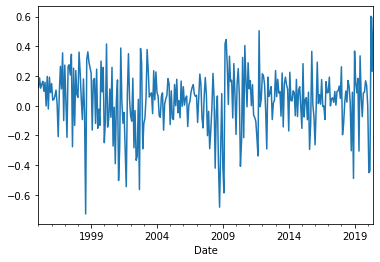

In [59]:
#Plot the resampled data
%matplotlib inline
df_copy['SP500_%Change'].resample('M').mean().plot()

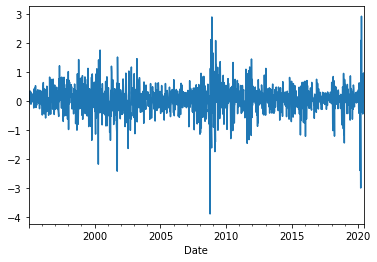

In [60]:
# Weekly
#Plot the resampled data
%matplotlib inline
df_copy['SP500_%Change'].resample('W').mean().plot()

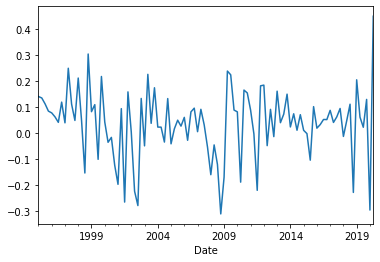

In [61]:
# Quarterly
#Plot the resampled data
%matplotlib inline
df_copy['SP500_%Change'].resample('Q').mean().plot()

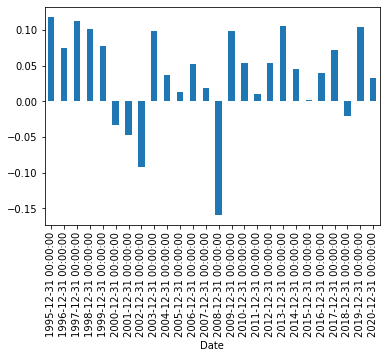

In [64]:
# Bar chart
#Plot the resampled data
%matplotlib inline
df_copy['SP500_%Change'].resample('Y').mean().plot(kind = 'bar') 

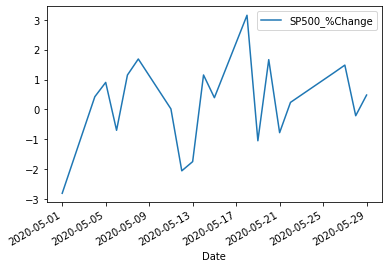

In [66]:
# OriginaL plot
%matplotlib inline
df_copy['2020-05-01':'2020-05-30'].plot()

Note for time series plotting
1. It will be easy to select the partial (part of) data for plotting tasks when datetime index is set.
2. We should always use Timestamp to select sliced/partial data, no matter whether datetime index is set or not!

# Test

    Month    TSM
0       1  255.0
1       2  246.0
2       3  247.5
3       4  227.0
4       5  224.0
5       6  216.5
6       7  246.0
7       8  256.0
8       9  262.5
9      10  234.0
10     11  225.5
11     12  225.5


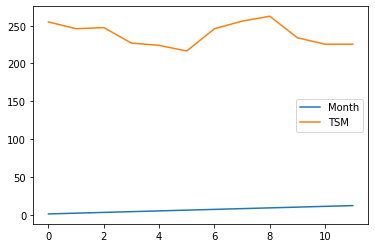

In [70]:
%matplotlib inline
#Make pseudo dataframe
month = [1,2,3,4,5,6,7,8,9,10,11,12]
stock_tsmcc = [255,246,247.5,227,224,216.5,246,256,262.5,234,225.5,225.5]
df_pseudo = pd.DataFrame({'Month':month,
                          'TSM':stock_tsmcc
    }
                        )
print(df_pseudo)

df_pseudo.plot()
#If datetime is numeric, it will also be plotted and be shown in the figure, which makes no sense practically.

   Month    TSM
0    1/1  255.0
1    1/2  246.0
2    1/3  247.5
3    1/4  227.0
4    1/5  224.0
5    1/6  216.5
6    1/7  246.0
7    1/8  256.0
8    1/9  262.5
9   1/10  234.0
10  1/11  225.5
11  1/12  225.5
<class 'str'>


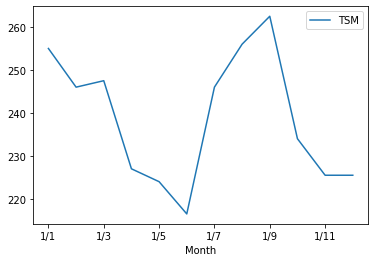

In [96]:
%matplotlib inline
#Make pseudo dataframe
month = ['1/1','1/2','1/3','1/4','1/5','1/6','1/7','1/8','1/9','1/10','1/11','1/12']
stock_tsmcc = [255,246,247.5,227,224,216.5,246,256,262.5,234,225.5,225.5]
df_pseudo = pd.DataFrame({'Month':month,
                          'TSM':stock_tsmcc
    }
                        )
print(df_pseudo)
print(type(df_pseudo['Month'][0]))
df_pseudo.plot(x = 'Month')
#If date time is "string", it will be automatedly ignored and be replaced with its index if x in plot() func. is not specified.

        Month    TSM
0  2019-12-31  250.0
1  2020-01-01  255.0
2  2020-01-02  246.0
3  2020-01-03  247.5
4  2020-01-04  227.0
5  2020-01-05  224.0
6  2020-01-06  216.5
7  2020-01-07  246.0
8  2020-01-08  256.0
9  2020-01-09  262.5
10 2020-01-10  234.0
11 2020-01-11  225.5
12 2020-01-12  225.5
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


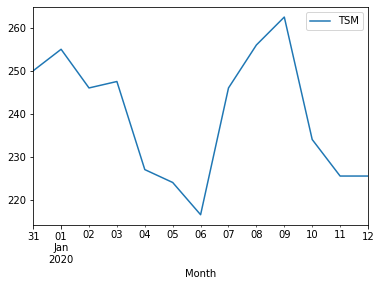

In [95]:
%matplotlib inline
from dateutil.parser import parse

#Make pseudo dataframe
month = ['2019/12/31','2020/1/1','2020/1/2','2020/1/3','2020/1/4','2020/1/5','2020/1/6','2020/1/7','2020/1/8',
         '2020/1/9','2020/1/10','2020/1/11','2020/1/12']
# month = ['1/1','1/2','1/3','1/4','1/5','1/6','1/7','1/8','1/9','1/10','1/11','1/12']
stock_tsmcc = [250,255,246,247.5,227,224,216.5,246,256,262.5,234,225.5,225.5]


month_parse = [parse(m) for m in month]
new_month = [m_parse.strftime('%Y-%m-%d') for m_parse in month_parse]


df_pseudo = pd.DataFrame({'Month': new_month,
                          'TSM': stock_tsmcc
    }
                        )

df_pseudo.Month = pd.DatetimeIndex(df_pseudo.Month)
#df_pseudo['Month'] = pd.to_datetime(df_pseudo['Month']) #, errors = 'coerce')

print(df_pseudo)
print(type(df_pseudo['Month'][0]))

df_pseudo.plot(x = 'Month')
#If date time is Timestamp, x = 'datetime' should be specified in .plot() function so that it can run successfully.
#When creating pseudo dataframe and the year is not specified, the error will come: Out of bounds nanosecond timestamp: 1-01-01 00:00:00
#Because the missing year in this case is automatedly viewed as the year 1 (not 2020 or else), the year 1 is not preserved in timestamps.
